<a href="https://colab.research.google.com/github/Vishal-Sharma-26/Erroneous-weight--volume-consignment/blob/master/Erroneous_weight_volume_consignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://github.com/Vishal-Sharma-26/Erroneous-weight--volume-consignment/raw/master/P2_consignment_data.csv')
df.head()

,id,created_date,cnote,client_id,weight,Voloume,total_boxes,industry_type,QC_Validation,delivered,Delivery_Date,cpm
0,32123,15-01-2019 00:00,8000522895,1112,13.0,3.23,1,APPAREL,Yes,1,19-01-2019 17:01,1
1,32124,15-01-2019 00:00,8000119761,1113,122.0,23.30,14,3PL,Yes,1,17-01-2019 11:18,1
2,32125,15-01-2019 00:01,8000522921,1112,19.0,3.23,1,APPAREL,Yes,1,18-01-2019 10:38,1
3,32126,15-01-2019 00:01,8000574330,1114,68.0,11.16,4,3PL,Yes,1,18-01-2019 17:42,0
4,32127,15-01-2019 00:02,1002478259,1115,1075.0,73.35,50,CHEMICALS,Yes,1,22-01-2019 17:29,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86663 entries, 0 to 86662
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             86663 non-null  int64  
 1   created_date   86663 non-null  object 
 2   cnote          86663 non-null  object 
 3   client_id      86663 non-null  int64  
 4   weight         86663 non-null  float64
 5   Voloume        86663 non-null  float64
 6   total_boxes    86663 non-null  int64  
 7   industry_type  86663 non-null  object 
 8   QC_Validation  86663 non-null  object 
 9   delivered      86663 non-null  int64  
 10  Delivery_Date  62536 non-null  object 
 11  cpm            86663 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.9+ MB


In [5]:
df.describe()

,id,client_id,weight,Voloume,total_boxes,delivered,cpm
count,86663.000000,86663.000000,86663.000000,86663.000000,86663.000000,86663.000000,86663.000000
mean,75454.000000,1416.670528,173.698001,23.873519,12.463785,0.721531,0.473732
std,25017.597527,289.988267,420.926298,64.729583,34.870762,0.448248,0.499312
min,32123.000000,1112.000000,0.020000,0.000000,1.000000,0.000000,0.000000
25%,53788.500000,1182.000000,18.000000,1.990000,1.000000,0.000000,0.000000
50%,75454.000000,1312.000000,48.000000,6.460000,3.000000,1.000000,0.000000
75%,97119.500000,1589.000000,147.135000,20.670000,10.000000,1.000000,1.000000
max,118785.000000,2407.000000,11910.000000,7450.880000,2000.000000,1.000000,1.000000


In [6]:
df.columns

Index(['id', 'created_date', 'cnote', 'client_id', 'weight', 'Voloume',
       'total_boxes', 'industry_type', 'QC_Validation', 'delivered',
       'Delivery_Date', 'cpm'],
      dtype='object')

In [7]:
df.shape

(86663, 12)

In [8]:
df['cpm'].value_counts()

0    45608
1    41055
Name: cpm, dtype: int64

In [9]:
df.groupby('cpm').mean()

<ipython-input-9-278bb26c04ef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cpm').mean()


,id,client_id,weight,Voloume,total_boxes,delivered
cpm,,,,,,
0,85106.318058,1418.643725,186.234325,26.075330,13.474697,0.470970
1,64731.239752,1414.478504,159.771398,21.427527,11.340762,0.999878


In [10]:
y = df['cpm']

In [11]:
y.shape

(86663,)

In [12]:
y

0        1
1        1
2        1
3        0
4        1
        ..
86658    0
86659    0
86660    0
86661    0
86662    0
Name: cpm, Length: 86663, dtype: int64

In [13]:
x = df[['id', 'created_date', 'cnote', 'client_id', 'weight', 'Voloume',
       'total_boxes', 'industry_type', 'QC_Validation', 'delivered',
       'Delivery_Date']]

In [14]:
x = df.drop(['cpm'], axis=1)

In [16]:
x.shape

(86663, 11)

In [17]:
x

,id,created_date,cnote,client_id,weight,Voloume,total_boxes,industry_type,QC_Validation,delivered,Delivery_Date
0,32123,15-01-2019 00:00,8000522895,1112,13.0,3.23,1,APPAREL,Yes,1,19-01-2019 17:01
1,32124,15-01-2019 00:00,8000119761,1113,122.0,23.30,14,3PL,Yes,1,17-01-2019 11:18
2,32125,15-01-2019 00:01,8000522921,1112,19.0,3.23,1,APPAREL,Yes,1,18-01-2019 10:38
3,32126,15-01-2019 00:01,8000574330,1114,68.0,11.16,4,3PL,Yes,1,18-01-2019 17:42
4,32127,15-01-2019 00:02,1002478259,1115,1075.0,73.35,50,CHEMICALS,Yes,1,22-01-2019 17:29
...,...,...,...,...,...,...,...,...,...,...,...
86658,118781,30-01-2019 13:59,2000682467,1316,408.0,28.33,34,ELECTRONICS,NO,0,NaN
86659,118782,30-01-2019 14:01,8000651951,2276,195.0,28.57,24,ELECTRONICS,NO,0,NaN
86660,118783,30-01-2019 14:09,8000651952,2276,448.0,66.66,56,ELECTRONICS,NO,0,NaN
86661,118784,30-01-2019 14:16,8000651953,1184,32.0,5.19,2,NON-ECOMMERCE,NO,0,NaN


In [37]:
dir(df)

['Delivery_Date',
 'QC_Validation',
 'T',
 'Voloume',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [38]:
df.corr().style.background_gradient(cmap='Reds')

<ipython-input-38-475bb6d7fd97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='Reds')


,id,client_id,weight,Voloume,total_boxes,delivered,cpm
id,1.000000,0.099304,0.007098,-0.007164,-0.009747,-0.682801,-0.406655
client_id,0.099304,1.000000,0.069837,0.033499,0.025035,-0.037215,-0.007172
weight,0.007098,0.069837,1.000000,0.640623,0.688090,-0.029419,-0.031391
Voloume,-0.007164,0.033499,0.640623,1.000000,0.586825,-0.021232,-0.035852
total_boxes,-0.009747,0.025035,0.688090,0.586825,1.000000,-0.009226,-0.030556
delivered,-0.682801,-0.037215,-0.029419,-0.021232,-0.009226,1.000000,0.589161
cpm,-0.406655,-0.007172,-0.031391,-0.035852,-0.030556,0.589161,1.000000


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-43-47b0af101598>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


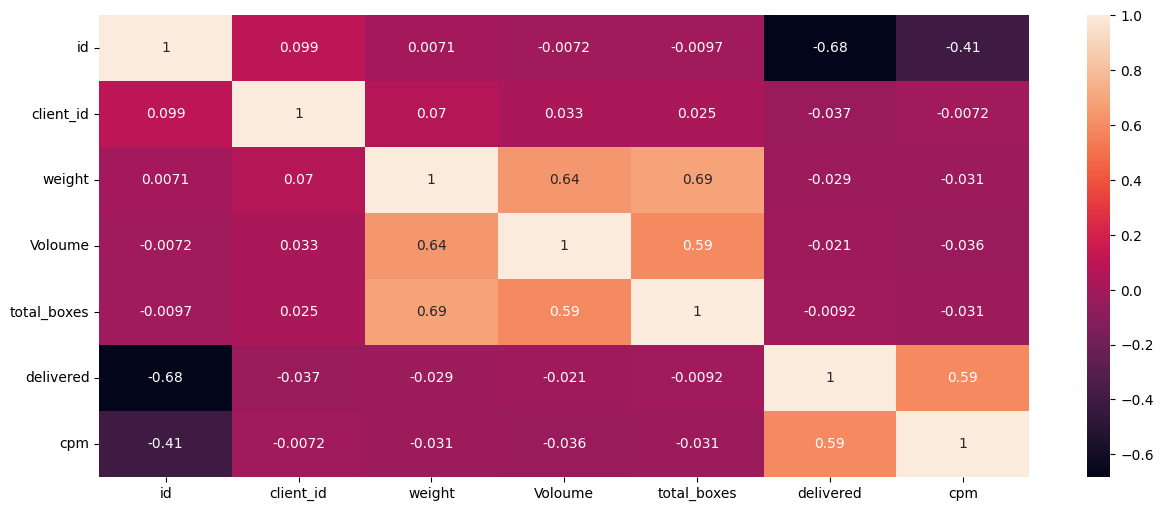

In [43]:
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(df.corr(),annot=True);

In [49]:
import plotly.express as px
fig = px.scatter(df, x = 'industry_type', y = 'total_boxes')
fig.show()

In [50]:
df1 = pd.read_csv('https://github.com/Vishal-Sharma-26/Erroneous-weight--volume-consignment/raw/master/P2_consignment_volume_data.csv')

In [51]:
df1.head()

,consignment_id,length,breadth,height,unit,number_of_boxes,created_at
0,32123,31.0,12.0,15.0,IN,1,NaN
1,32124,22.0,8.0,12.0,IN,2,NaN
2,32124,23.0,13.0,11.0,IN,4,NaN
3,32124,20.0,11.0,13.0,IN,8,NaN
4,32125,31.0,12.0,15.0,IN,1,NaN


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149487 entries, 0 to 149486
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   consignment_id   149487 non-null  int64  
 1   length           149487 non-null  float64
 2   breadth          149487 non-null  float64
 3   height           149487 non-null  float64
 4   unit             149487 non-null  object 
 5   number_of_boxes  149487 non-null  int64  
 6   created_at       0 non-null       float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.0+ MB


In [61]:
df1.describe()

,consignment_id,length,breadth,height,number_of_boxes,created_at
count,149487.000000,149487.000000,149487.000000,149487.000000,149487.000000,0.0
mean,75125.807401,25.513714,14.366016,17.556680,7.227070,NaN
std,24940.169224,20.657039,11.281035,13.236727,23.488246,NaN
min,32123.000000,1.000000,1.000000,0.500000,1.000000,NaN
25%,53371.500000,15.000000,8.000000,11.000000,1.000000,NaN
50%,75003.000000,20.000000,12.000000,15.000000,2.000000,NaN
75%,96530.000000,28.000000,16.000000,20.000000,5.000000,NaN
max,118785.000000,1417.000000,426.000000,1235.000000,2000.000000,NaN


In [62]:
df1.shape

(149487, 7)

In [64]:
np.percentile(df1.number_of_boxes,[99])[0]

91.0

In [66]:
uv = np.percentile(df1.number_of_boxes,[99])[0]

In [67]:
df1[(df1.number_of_boxes>uv)]

,consignment_id,length,breadth,height,unit,number_of_boxes,created_at
80,32168,10.0,7.0,7.0,IN,100,NaN
179,32218,12.0,7.0,12.0,IN,126,NaN
285,32272,9.5,5.0,7.5,IN,115,NaN
293,32278,68.0,69.0,19.0,CM,250,NaN
417,32343,22.0,13.0,18.0,IN,102,NaN
...,...,...,...,...,...,...,...
149109,118554,16.0,18.0,13.0,IN,96,NaN
149181,118600,15.0,9.0,11.0,IN,200,NaN
149424,118748,17.0,8.0,10.0,IN,95,NaN
149433,118753,9.0,8.0,8.0,IN,106,NaN


In [71]:
import statsmodels.api as sn
x = sn.add_constant(df1['length'])

In [72]:
lm = sn.OLS(df1['consignment_id'],x).fit()

In [73]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         consignment_id   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     18.16
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           2.03e-05
Time:                        07:51:34   Log-Likelihood:            -1.7255e+06
No. Observations:              149487   AIC:                         3.451e+06
Df Residuals:                  149485   BIC:                         3.451e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.479e+04    102.505    729.584      0.000    7.46e+04     7.5e+04
length        13.3066      3.123      4.261      0.000       7.187      19.427
==============================================================================
Omnibus:                   126656.060   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8901.853
Skew:                           0.017   Prob(JB):                         0.00
Kurtosis:                       1.805   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

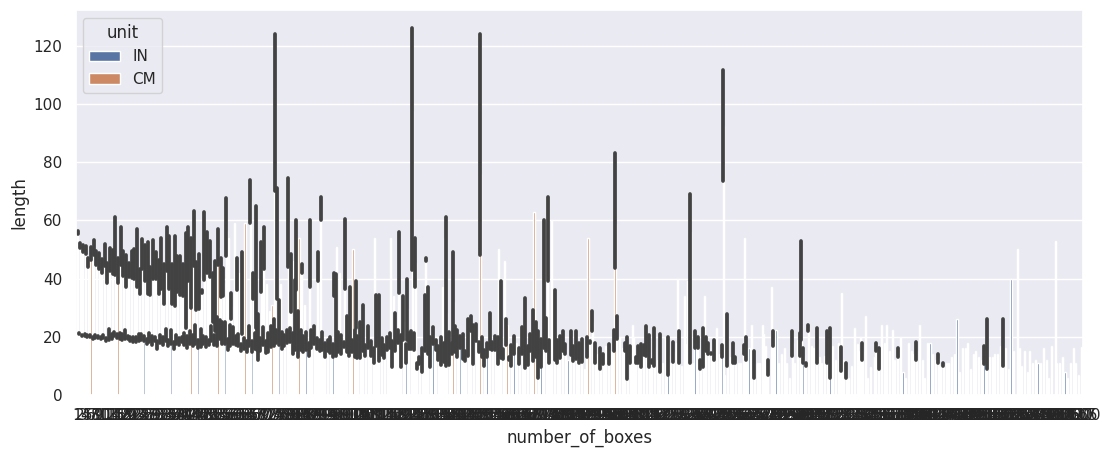

In [76]:
sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x='number_of_boxes', y='length', data = df1, hue='unit')
plt.show()

<ipython-input-77-7ee6dfeee21d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



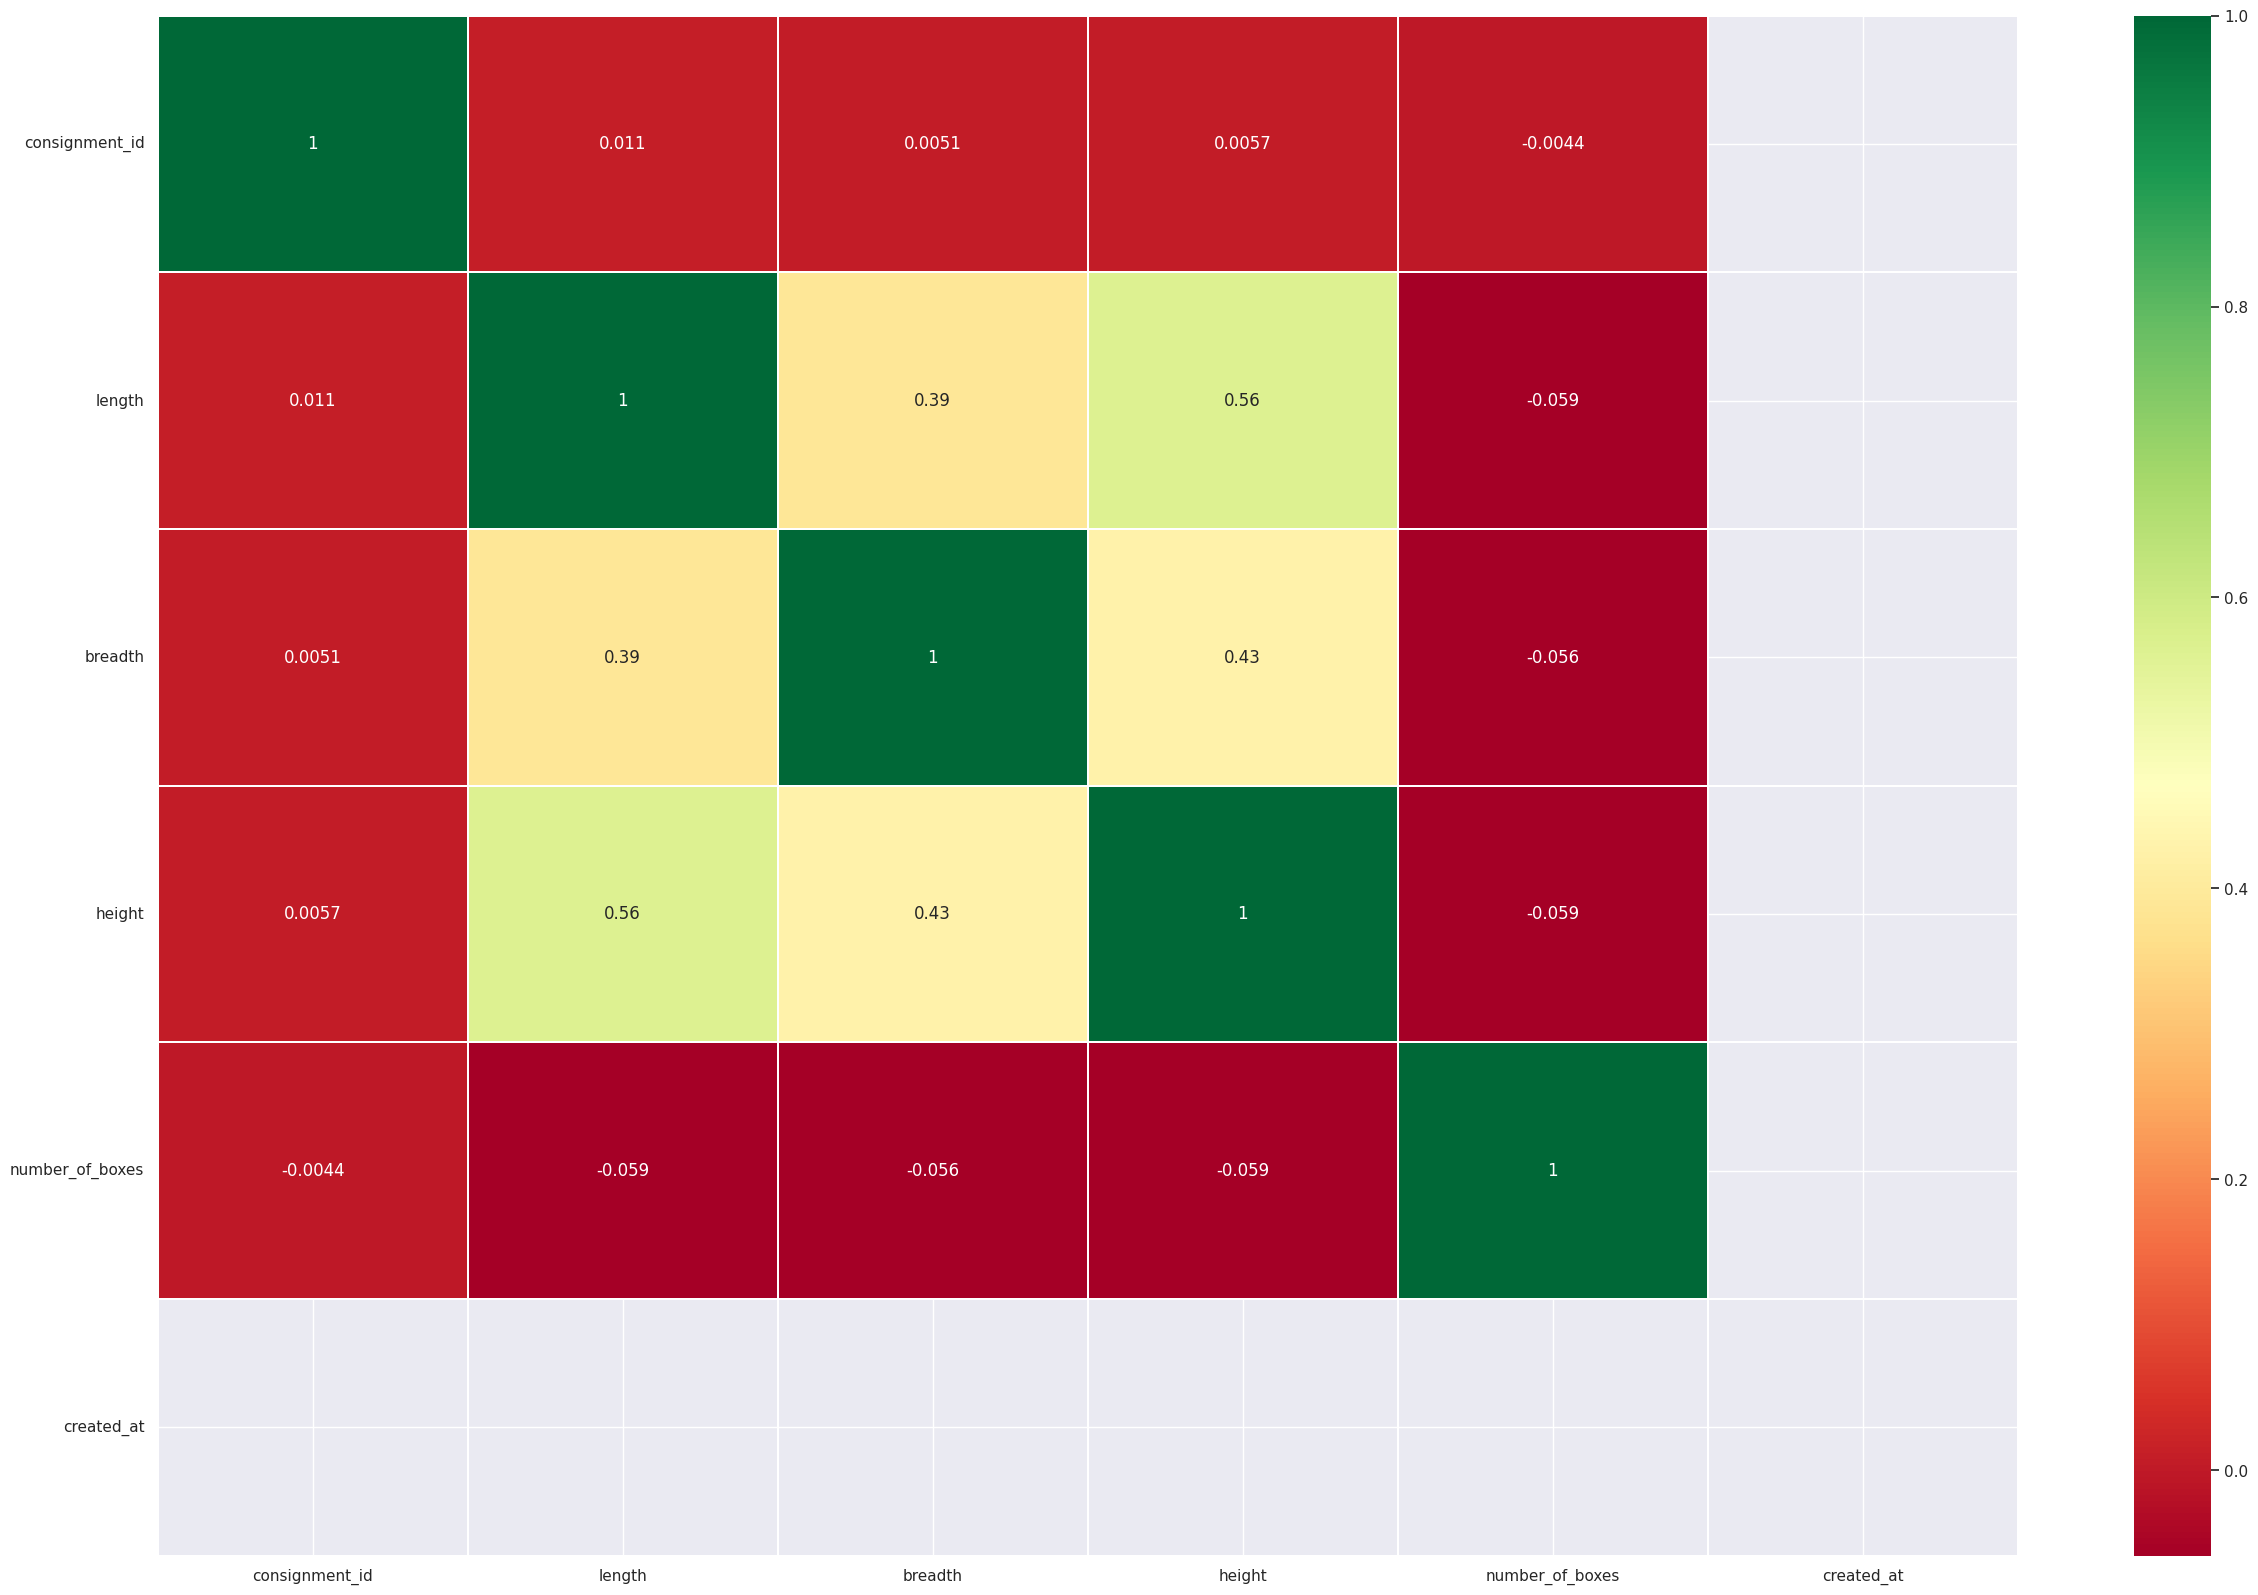

In [77]:
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,20)
plt.show()

<ipython-input-83-f1e58a15a2ad>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



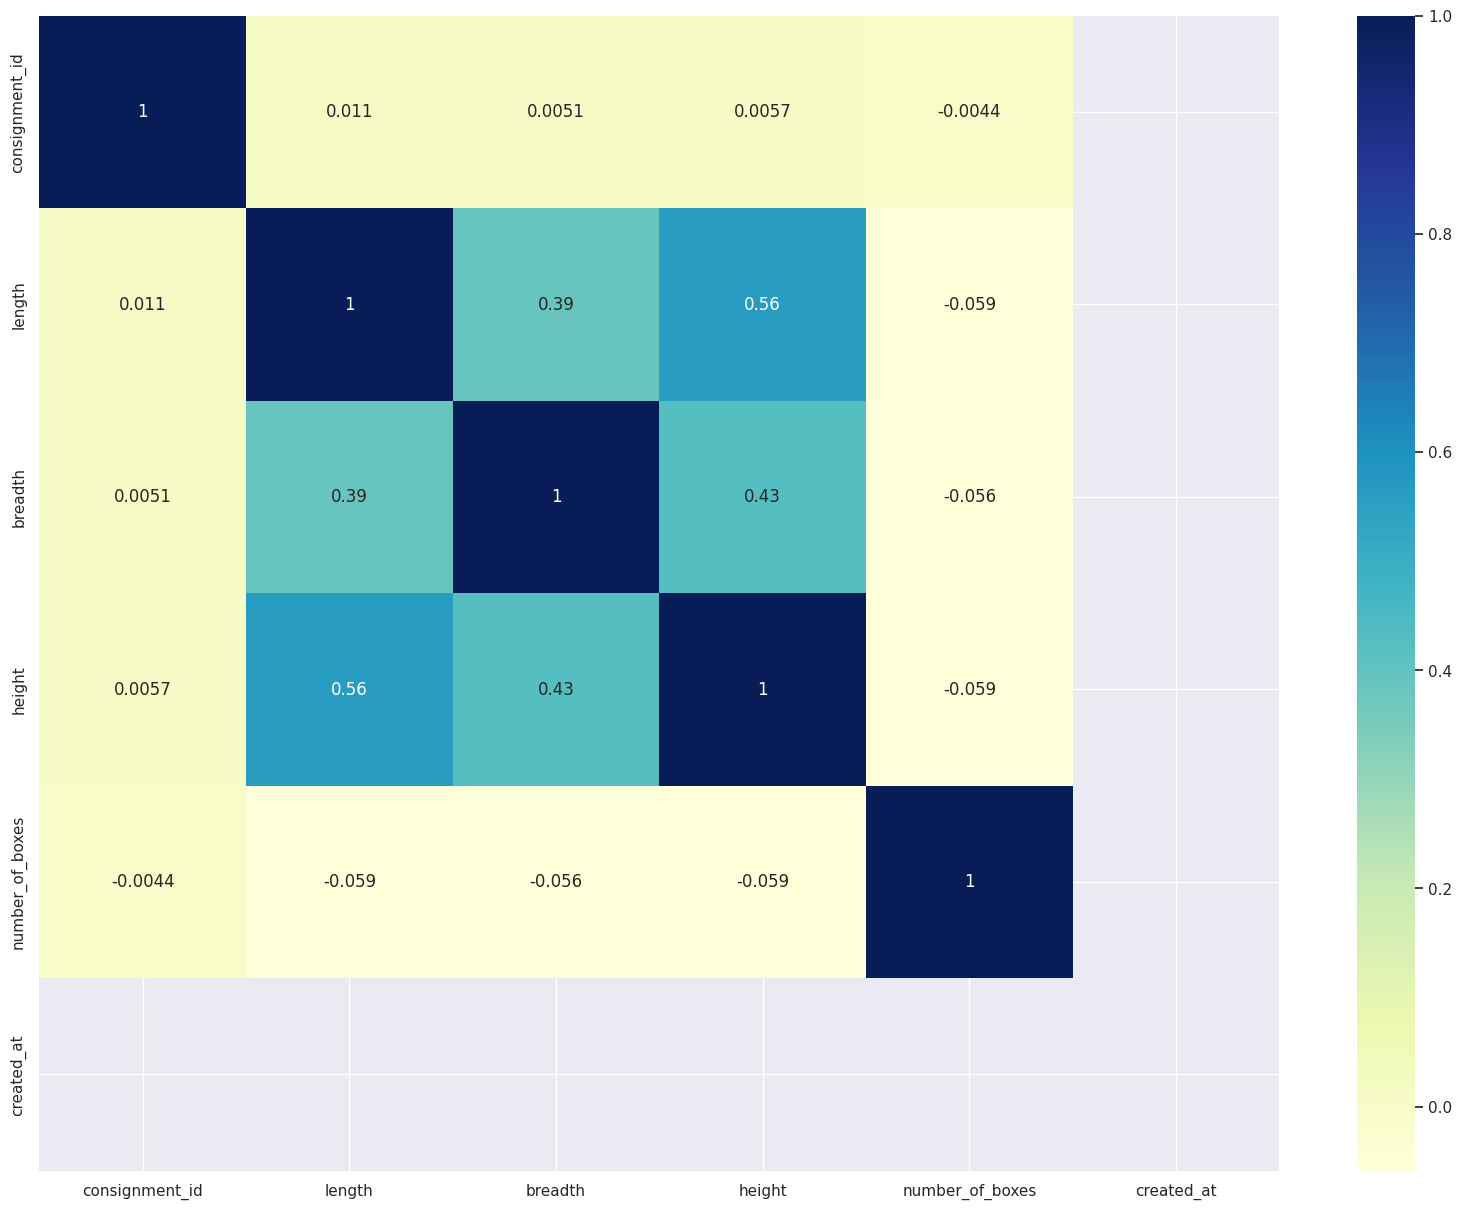

In [83]:
def plot_correlation(
  dataframe: pd.DataFrame,
  plot: bool = True
) -> pd.Series:
  correlation = dataframe.corr()

  if plot:
    sns.set(rc={'figure.figsize':(20,15)})
    sns.heatmap(correlation, cmap="YlGnBu", annot=True)

  return correlation
correlation = plot_correlation(df1)